# Cálculo de histograma

## 1. Cálculo do histograma de um sinal 1D

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calcularemos o histograma do seguinte sinal 1D:
signal = [5, 10, 12, 12, 33, 6, 34, 52, 50, 70]
num_bins = 5

v_min = min(signal)
bin_size = (max(signal)-v_min+1)/num_bins # O +1 é só para facilitar o cálculo do índice do maior valor
hist = np.zeros(num_bins)
num_values = len(signal)
for value in signal:
    bin_index = (value-v_min)/bin_size
    bin_index = int(bin_index)
    hist[bin_index] += 1
    
# Cálculo do intervalo de cada caixa do histograma
bins_values = np.zeros(num_bins+1)
for i in range(num_bins+1):
    bins_values[i] = v_min + i*bin_size
print('Size of each bin: %f'%bin_size)
print('Bin values: %s'%bins_values)
print('Histogram:')
print(hist)

Size of each bin: 13.200000
Bin values: [ 5.  18.2 31.4 44.6 57.8 71. ]
Histogram:
[5. 0. 2. 2. 1.]


In [19]:
(70-v_min)/bin_size

4.924242424242425

<BarContainer object of 5 artists>

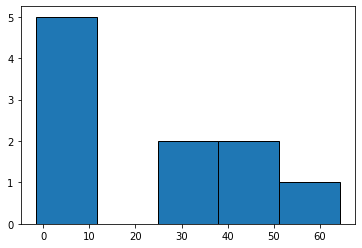

In [20]:
plt.bar(bins_values[:-1], hist, bin_size, edgecolor='k')

In [21]:
# Cálculo do histograma utilizando a biblioteca numpy
hist, bins = np.histogram(signal, num_bins)
print('bins: %s'%bins)
print('hist: %s'%hist)

bins: [ 5. 18. 31. 44. 57. 70.]
hist: [5 0 2 2 1]


(array([5., 0., 2., 2., 1.]),
 array([ 5., 18., 31., 44., 57., 70.]),
 <a list of 5 Patch objects>)

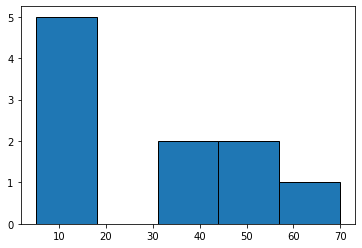

In [22]:
# Cálculo do histograma e plotagem utilizando a biblioteca matplotlib
plt.hist(signal, num_bins, edgecolor='k')

## 2. Cálculo do histograma de uma imagem

<BarContainer object of 50 artists>

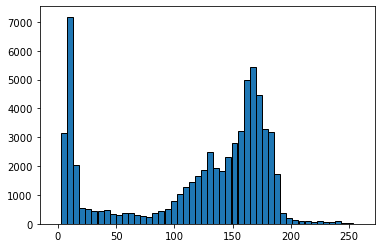

In [23]:
# Leitura da imagem
img = plt.imread('cameraman.tiff')

num_bins = 50             # Número de caixas no histograma
bin_size = 256/num_bins   # Tamanho de cada caixa

hist = np.zeros(num_bins)
num_rows, num_cols = img.shape
for row in range(num_rows):
    for col in range(num_cols):
        bin_index = img[row, col]/bin_size
        bin_index = int(bin_index)
        hist[bin_index] += 1
        
# Cálculo do intervalo de cada caixa, utilizando a função linspace do numpy      
bins_values = np.linspace(0, 256, num_bins)     
plt.bar(bins_values, hist, bin_size, edgecolor='k')

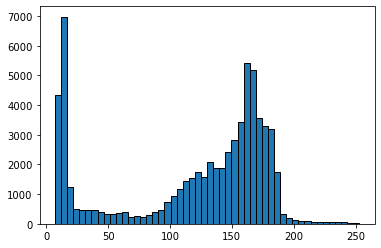

In [24]:
_ = plt.hist(img.flatten(), num_bins, edgecolor='k')

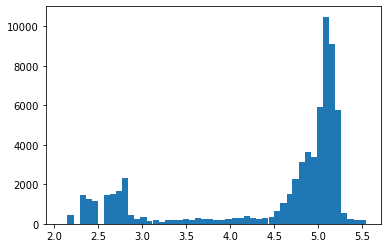

In [25]:
# Aplica a tranformação log e calcula o histograma da imagem resultante
_=plt.hist(np.log(1+img.flatten()), 50)

(array([4338., 6976., 1228.,  515.,  475.,  464.,  462.,  385.,  340.,
         314.,  375.,  390.,  233.,  274.,  238.,  298.,  381.,  450.,
         720.,  946., 1168., 1430., 1532., 1761., 1592., 2091., 1879.,
        1867., 2424., 2819., 3445., 5417., 5167., 3554., 3289., 3195.,
        1729.,  334.,  207.,  140.,  102.,   90.,   73.,   73.,   77.,
          66.,   77.,   75.,   27.,   34.]),
 array([  7.  ,  11.92,  16.84,  21.76,  26.68,  31.6 ,  36.52,  41.44,
         46.36,  51.28,  56.2 ,  61.12,  66.04,  70.96,  75.88,  80.8 ,
         85.72,  90.64,  95.56, 100.48, 105.4 , 110.32, 115.24, 120.16,
        125.08, 130.  , 134.92, 139.84, 144.76, 149.68, 154.6 , 159.52,
        164.44, 169.36, 174.28, 179.2 , 184.12, 189.04, 193.96, 198.88,
        203.8 , 208.72, 213.64, 218.56, 223.48, 228.4 , 233.32, 238.24,
        243.16, 248.08, 253.  ]),
 <a list of 50 Patch objects>)

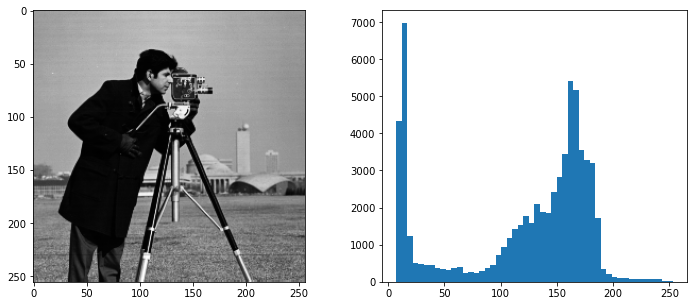

In [26]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.hist(img.flatten(), 50)

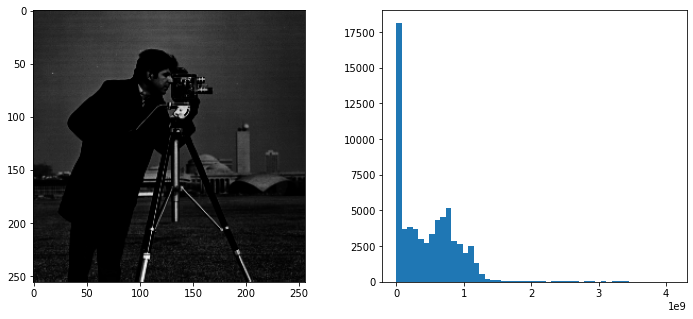

In [27]:
# Aplica transformação (correção gamma) para tornar a imagem mais escura, 
# e recalcula o histograma
exp = 4.
img_transf = img**exp
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(img_transf, 'gray')
plt.subplot(1, 2, 2)
_=plt.hist(img_transf.flatten(), 50)